In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
%matplotlib inline
from SphericalDiff import *
#plt.ion()
####%matplotlib notebook

In [2]:
Nside=128
Npix=Nside**2*12

In [3]:
#generatte kappa map with a blob in the center
kappa=np.zeros(Npix)
theta,phi=hp.pix2ang(Nside,np.arange(Npix))
phi[phi>np.pi]-=2*np.pi
kappa=SphericalMap(np.exp(-(phi**2+(theta-np.pi/2)**2)/(2*0.1**2)))

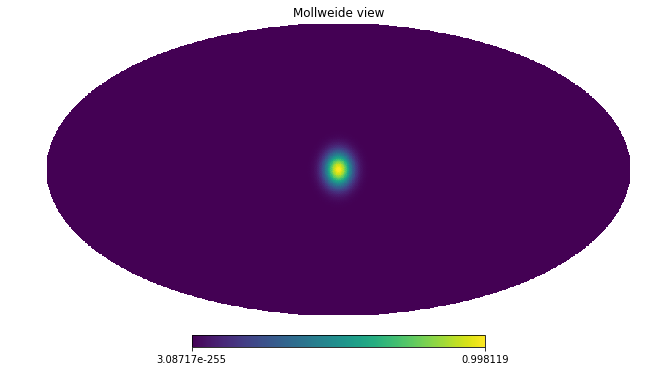

In [4]:
hp.mollview(kappa.A)

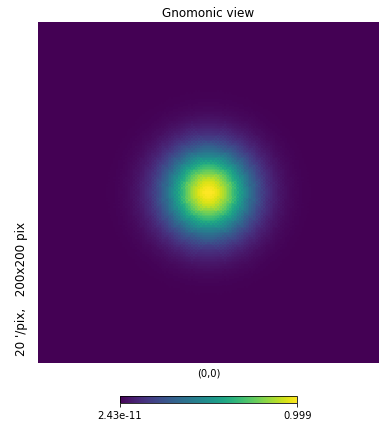

In [5]:
hp.gnomview(kappa.A,reso=20)

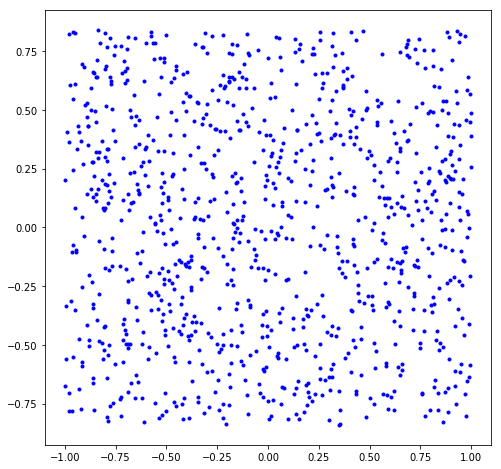

In [6]:
#generate some points to displace
Ndots=1000
theta=np.arccos(np.random.uniform(-np.sin(1),np.sin(1),Ndots))
phi=np.random.uniform(-1,1,Ndots)
plt.figure(figsize=(8,8))
plt.plot(phi,np.cos(theta),'b.')

In [7]:
thetap,phip=kappa.DisplaceObjects(theta,phi)

SphericalDiff.py:44: RuntimeWarning: invalid value encountered in divide
  x=self.Alm/(self.ell*(self.ell+1))


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
[  0.00000000e+00+0.j   0.00000000e+00+0.j   1.29544185e-18+0.j
  -8.08725617e-03+0.j  -1.06775272e-18+0.j   4.06172016e-03+0.j
   9.50026434e-19+0.j  -2.50182471e-03+0.j  -8.21188264e-19+0.j
   1.64317458e-03+0.j]
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


SphericalDiff.py:53: RuntimeWarning: invalid value encountered in sqrt
  almp*=np.sqrt((self.ell+self.em+1)*(self.ell-self.em+1)*(2*self.ell+1)/(2*self.ell+3))


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


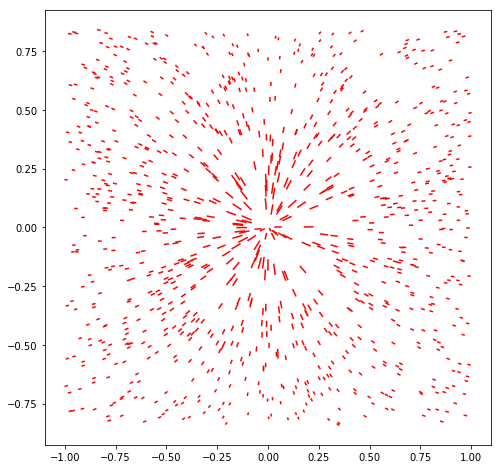

In [8]:
## plot displacements, there are issues with projection hence weird at the edges
plt.figure(figsize=(8,8))
for t,p,t2,p2 in zip(np.cos(theta),phi,np.cos(thetap),phip):
    plt.plot([p,p2],[t,t2],'r-')
#plt.plot(np.cos(thetap),phip,'b.')

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
[  0.00000000e+00+0.j   0.00000000e+00+0.j   1.29544185e-18+0.j
  -8.08725617e-03+0.j  -1.06775272e-18+0.j   4.06172016e-03+0.j
   9.50026434e-19+0.j  -2.50182471e-03+0.j  -8.21188264e-19+0.j
   1.64317458e-03+0.j]
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


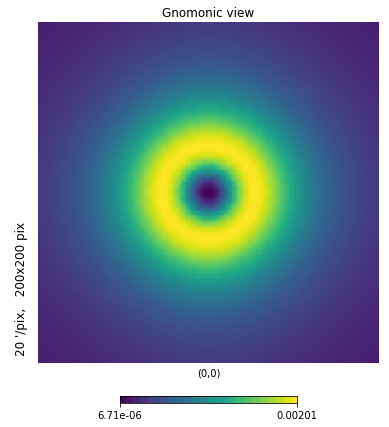

In [9]:
## plot of displacement size
lphi=kappa.invLaplace() 
dtheta=lphi.dtheta().A
dphi=lphi.dphi().A
hp.gnomview(dtheta**2+dphi**2,reso=20)